# SVR

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

### Data Import

In [4]:
data = pd.read_csv("../Data/Position_Salaries.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [6]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [19]:
X = data.iloc[:,1:2].values
y = data.iloc[:,-1].values

### Fitting SVR to the Data

In [8]:
from sklearn.svm import SVR
svr = SVR()

In [9]:
svr.fit(X, y)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

### Predicting a New Value

In [10]:
pred = svr.predict([[6.5]])
pred

array([130001.55760156])

So this seems like a good prediction, let's check another level.

In [11]:
pred = svr.predict([[9.5]])
pred

array([130001.66493603])

Now that first prediction isn't looking so good any more. Lets review the regression line created by our SVR regressor.

### Plotting the SVR

Text(0, 0.5, 'Salary')

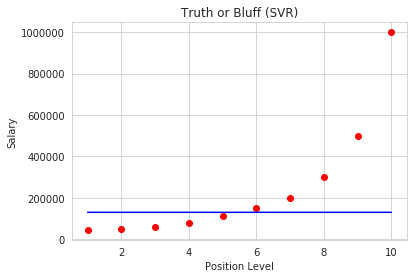

In [12]:
plt.scatter(X, y, color = "red")
plt.plot(X, svr.predict(X), color = "blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

Clearly this is not a well fitting regressor, as we've created a simple horizontal line. SVR needs manual feature scaling for it to work sucessfully. Below, lets add the feture scaling and try this again.

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scal_x = StandardScaler()
scal_y = StandardScaler()

In [15]:
X = scal_x.fit_transform(X)
y = scal_y.fit_transform(y.reshape(-1,1))

### Refitting the SVR regressor

In [16]:
svr.fit(X, y)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

### Plotting the Refit SVR

Text(0, 0.5, 'Salary')

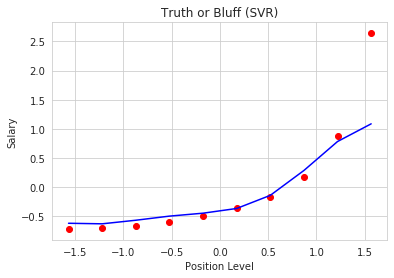

In [17]:
plt.scatter(X, y, color = "red")
plt.plot(X, svr.predict(X), color = "blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

This now fits relatively well to the majority of the data, but not to the CEO point. The svr algorithm sees this point as an outlier, and does not fit the model to it.

### Predicting a New Value

In [18]:
pred = scal_y.inverse_transform(svr.predict(scal_x.transform([[6.5]])))
pred

array([170370.0204065])

In [24]:
pred = scal_y.inverse_transform(svr.predict(scal_x.transform([[9.5]])))
pred

array([525887.86348246])

These predictions are MUCH better than those seen from the first (totally useless) model.